In [25]:
!pip3 install tabulate

In [ ]:
!pip3 install matplotlib

In [92]:
!pip3 install seaborn

In [87]:
import random
import timeit
from typing import List, Tuple
from tabulate import tabulate
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Лабораторная работа 1. Методы сортировки

Вариант: 20

# Сортировка подсчетом

### 1. Классификация алгоритма:

- По типу алгоритма: сортировка без сравнений

- По устойчивости: устойчивый

- По месту хранения данных: требует выделения дополнительной памяти

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(k)$, где $k$ - диапазон значений сортируемых элементов
   
- Время выполнения: 
  
  - В худшем случае: $O(n+k)$
  
  - В лучшем случае: $O(n+k)$
  
  - В среднем: $O(n+k)$

### 2. Теоретическое описание алгоритма:

Сортировка подсчетом (Counting Sort) - это несравнительный алгоритм сортировки, который сортирует массив путем подсчета количества элементов с определенным значением.

Алгоритм состоит из трех основных шагов:

1. Подсчет количества элементов каждого значения в сортируемом массиве и сохранение этой информации во вспомогательном массиве (массиве подсчета).
2. Вычисление кумулятивной суммы количества элементов во вспомогательном массиве.
3. Распределение элементов сортируемого массива на основе кумулятивной суммы во вспомогательном массиве.

### 3. Блок-схема алгоритма

![diagram_counting_sort](diagram.png)

### 4. Псевдокод алгоритма

```
counting_sort(arr):
    if length of arr is 0, return arr

    min_val = minimum value in arr
    max_val = maximum value in arr

    count_arr = array of 0s with length (max_val - min_val + 1)

    for num in arr:
        count_arr[num - min_val] += 1

    sorted_arr = empty array
    for i in range(length of count_arr):
        for j in range(count_arr[i]):
            sorted_arr.append(i + min_val)

    return sorted_arr
```


### 5. Достоинства и недостатки алгоритма

Достоинства алгоритма:
    
    -- Эффективен для сортировки массивов, у которых значение k не слишком велико.
    -- Устойчивый алгоритм сортировки, сохраняющий порядок равных элементов.
    
Недостатки:

    -- Требует выделения дополнительной памяти для массива подсчета и результирующего массива.
    -- Неэффективен для сортировки массивов, у которых диапазон значений слишком велик.

### 6. Реализация алгоритма

In [8]:
def counting_sort(arr):
    if len(arr) == 0:
        return arr

    # определяем максимальное и минимальное значения
    min_val = min(arr)
    max_val = max(arr)

    # создаем массив для подсчета количества элементов
    count_arr = [0] * (max_val - min_val + 1)

    # подсчитываем количество элементов
    for num in arr:
        count_arr[num - min_val] += 1

    # создаем выходной массив
    sorted_arr = []
    for i in range(len(count_arr)):
        for j in range(count_arr[i]):
            sorted_arr.append(i + min_val)

    return sorted_arr

In [9]:
def counting_sort_example(arr):
    if len(arr) == 0:
        return arr

    min_val = min(arr)
    max_val = max(arr)

    print("MIN = ", min_val, "  MAX = ", max_val, "\n")
    print(max_val, " - ", min_val, " + 1 = ", "число нулей", "\n")

    count_arr = [0] * (max_val - min_val + 1)
    print(" "*6, count_arr, "\n")

    for num in arr:
        count_arr[num - min_val] += 1
        print("Число ", num, "в массиве. Значит добавим в массив с нулями единицу на ", num - min_val, " позицию")
        print(" " * 6, count_arr, "\n\n")

    print("Прошлись по всем цифрам, теперь создаем пустой массив")

    sorted_arr = []
    for i in range(len(count_arr)):
        for j in range(count_arr[i]):
            sorted_arr.append(i + min_val)
        if count_arr[i] != 0:
            print("\n", "Встретили ", count_arr[i], " раз позицию ", i, ". Значит, в итоговый массив добавим позицию + минимальное число = ", i + min_val, " ", count_arr[i], " раз.")
            print(" " * 6, sorted_arr)

    return sorted_arr

A = [5, 8, 12, 7, 6]
A = counting_sort_example(A)

MIN =  5   MAX =  12 

12  -  5  + 1 =  число нулей 

       [0, 0, 0, 0, 0, 0, 0, 0] 

Число  5 в массиве. Значит добавим в массив с нулями единицу на  0  позицию
       [1, 0, 0, 0, 0, 0, 0, 0] 


Число  8 в массиве. Значит добавим в массив с нулями единицу на  3  позицию
       [1, 0, 0, 1, 0, 0, 0, 0] 


Число  12 в массиве. Значит добавим в массив с нулями единицу на  7  позицию
       [1, 0, 0, 1, 0, 0, 0, 1] 


Число  7 в массиве. Значит добавим в массив с нулями единицу на  2  позицию
       [1, 0, 1, 1, 0, 0, 0, 1] 


Число  6 в массиве. Значит добавим в массив с нулями единицу на  1  позицию
       [1, 1, 1, 1, 0, 0, 0, 1] 


Прошлись по всем цифрам, теперь создаем пустой массив

 Встретили  1  раз позицию  0 . Значит, в итоговый массив добавим позицию + минимальное число =  5   1  раз.
       [5]

 Встретили  1  раз позицию  1 . Значит, в итоговый массив добавим позицию + минимальное число =  6   1  раз.
       [5, 6]

 Встретили  1  раз позицию  2 . Значит, в итоговый масси

### 7. Тестировка корректности работы

In [11]:
# Тест 1: пустой массив
assert counting_sort([]) == []

# Тест 2: массив из одного элемента
assert counting_sort([5]) == [5]

# Тест 3: массив из нескольких элементов
assert counting_sort([5, 3, 1, 8, 5, 2]) == [1, 2, 3, 5, 5, 8]

# Тест 4: массив с отрицательными элементами
assert counting_sort([-3, 5, -1, 8, 0, -2]) == [-3, -2, -1, 0, 5, 8]


### 8. Ручная трассировка алгоритма

    Давайте произведем ручную трассировку алгоритма сортировки подсчетом на примере неупорядоченного списка 
           [5, 3, 1, 6, 4, 3]:

1. Создаем список счетчиков размером 6 (максимальное значение - минимальное + 1), заполненный нулями: 
           [0, 0, 0, 0, 0, 0].
           
2. Проходим по списку и для каждого элемента увеличиваем значение в соответствующей ячейке счетчика минус минимальное значение.
    Для первого элемента 5, увеличиваем значение в ячейке 4: [0, 0, 0, 0, 1, 0].
    Для второго элемента 3, увеличиваем значение в ячейке 2: [0, 0, 1, 0, 1, 0].
    Для третьего элемента 1, увеличиваем значение в ячейке 0: [1, 0, 1, 0, 1, 0].
    Для четвертого элемента 6, увеличиваем значение в ячейке 5: [1, 0, 1, 0, 1, 1].
    Для пятого элемента 4, увеличиваем значение в ячейке 3: [1, 0, 1, 1, 1, 1].
    Для шестого элемента 3, увеличиваем значение в ячейке 2: [1, 0, 2, 0, 1, 1, 1].
    
3. Проходим по списку счетчиков и для каждого значения в ячейке i добавляем i + минимальное значение к результирующему списку столько раз, сколько значение i встречается в списке счетчиков.
    Добавляем 1 один раз: [1].
    Добавляем 3 два раза: [1, 3, 3].
    Добавляем 4 один раз: [1, 3, 3, 4].
    Добавляем 5 один раз: [1, 3, 3, 4, 5].
    Добавляем 6 один раз: [1, 3, 3, 4, 5, 6].
    
4. Итоговый отсортированный список: [1, 3, 3, 4, 5, 6].

### 9-10. Сравнение сортировки массивов, содержащих n1, n2, n3 и n4 для упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива.

In [6]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


In [48]:
n = 1000
multipliers = [1, 5, 2, 10]
results_n = []
for i in multipliers:
    n *= i
    results_n.append(timeit.timeit(lambda: counting_sort(get_sort_array(n)), number=10) * 1000)
    results_n.append(timeit.timeit(lambda: counting_sort(get_reverse_array(n)), number=10) * 1000)
    results_n.append(timeit.timeit(lambda: counting_sort(get_random_array(n)), number=10) * 1000)

### Время выполнения

In [50]:
name1 = "Sort"
name2 = "Reverse"
name3 = "Random"
n = [1000, 5000, 10000, 100000]
for i in range(0, 12, 3):
    print("*"*25)
    headers = ["Тип", f"Время для {n[i//3]}"]
    data = [[name1, f"{results_n[i]:.2f}"], [name2, f"{results_n[i+1]:.3f}"], [name3, f"{results_n[i+2]:.3f}"]]
    print(tabulate(data, headers=headers))
    print()


*************************
Тип        Время для 1000
-------  ----------------
Sort                3.46
Reverse             3.911
Random              7.807

*************************
Тип        Время для 5000
-------  ----------------
Sort               17.02
Reverse            13.727
Random             23.67

*************************
Тип        Время для 10000
-------  -----------------
Sort                18.98
Reverse             18.862
Random              40.793

*************************
Тип        Время для 100000
-------  ------------------
Sort                197.31
Reverse             197.119
Random              433.864



### 11. Иллюстрация эффективности алгоритмов сортировок по заданному критерию

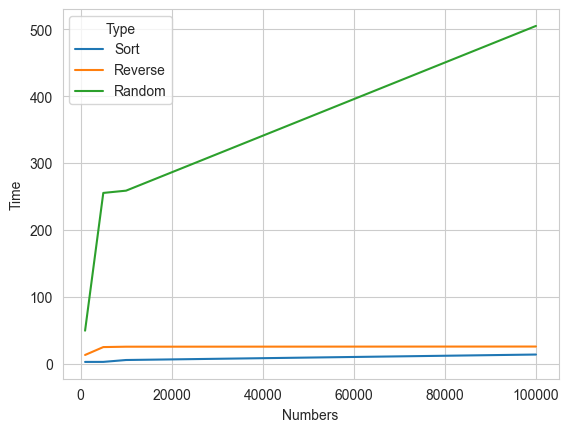

In [69]:
data = {
    name1: [f"{results_n[0]:.2f}", f"{results_n[1]:.2f}", f"{results_n[2]:.2f}", f"{results_n[3]:.2f}"],
    name2: [f"{results_n[4]:.2f}", f"{results_n[5]:.2f}", f"{results_n[6]:.2f}", f"{results_n[7]:.2f}"],
    name3: [f"{results_n[8]:.2f}", f"{results_n[9]:.2f}", f"{results_n[10]:.2f}", f"{results_n[11]:.2f}"]
}
results_df = pd.DataFrame(data=data, index=n)
df_t = df.transpose().reset_index().rename(columns={'index': 'Type'})

df_melted = pd.melt(df_t, id_vars=['Type'], var_name='Numbers', value_name='Time')

sns.lineplot(x='Numbers', y='Time', hue='Type', data=df_melted)
plt.show()